Classification Project
Why are our customers churning?

Some questions I have include:

Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

### Deliverables:

I will also need a report (ipynb) answering the question, "Why are our customers churning?" I want to see the analysis you did to answer my questions and lead to your findings. Please clearly call out the questions and answers you are analyzing. E.g. If you find that month-to-month customers churn more, I won't be surprised, but I am not getting rid of that plan. The fact that they churn is not because they can, it's because they can and they are motivated to do so. I want some insight into why they are motivated to do so. I realize you will not be able to do a full causal experiment, but I hope to see some solid evidence of your conclusions.

I will need you to deliver to me a csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn). I would also like a single goolgle slide that illustrates how your model works, including the features being used, so that I can deliver this to the SLT when they come with questions about how these values were derived. Please make sure you include how likely your model is to give a high probability of churn when churn doesn't occur, to give a low probability of churn when churn occurs, and to accurately predict churn.

Finally, our development team will need a .py file that will take in a new dataset, (in the exact same form of the one you acquired from telco_churn.customers) and perform all the transformations necessary to run the model you have developed on this new dataset to provide probabilities and predictions.

Specification
Detailed instructions for each section are below.

In general, make sure you document your work. You don't need to explain what every line of code is doing, but you should explain what and why you are doing. For example, if you drop a feature from the dataset, you should explain why you decided to do so, or why that is a reasonable thing to do. If you transform the data in a column, you should explain why you are making that transformation.

In addition, you should not present numers in isolation. If your code outputs a number, be sure you give some context to the number.

### Specific Deliverables:

- a jupyter notebook where your work takes place
- a csv file that predicts churn for each customer
- a python script that prepares data such that it can be fed into your model
- a google slide summarizing your model
- a README.md file that contains a link to your google slides presentation, and instructions for how to use your python script(s)

# Acquisition
Get the data from the customers table from the telco_churn database on the codeup data science database server.

You may wish to join some tables as part of your query.
This data should end up in a pandas data frame.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from telco_prepare import get_telco_data
from telco_prepare import prep_telco_data

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import scipy.stats as stats
from scipy.stats import pearsonr

import graphviz
from graphviz import Graph

import env

Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:

- creates dataframe object head_df (df of the first 5 rows) and prints contents to screen
- creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen
- creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen
- creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.
- prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [2]:
def peekatdata(df):
    Head_df = df.head(5)
    print('Header:  \n')
    print(Head_df)
    print('Tail:  \n')
    Tail_df = df.tail(5)
    print(Tail_df)
    print('Shape:  \n')
    Shape_tuple = df.shape
    print(Shape_tuple)
    print('Describe:  \n')
    Describe_df = df.describe()
    print(Describe_df)
    print('Info:  \n')
    print(df.info())
    return 

In [3]:
df = get_telco_data()
peekatdata(df)

Header:  

  customer_id  gender  senior_citizen partner dependents  tenure  \
0  0003-MKNFE    Male               0      No         No       9   
1  0013-MHZWF  Female               0      No        Yes       9   
2  0015-UOCOJ  Female               1      No         No       7   
3  0023-HGHWL    Male               1      No         No       1   
4  0032-PGELS  Female               0     Yes        Yes       1   

  phone_service    multiple_lines  internet_service_type_id online_security  \
0           Yes               Yes                         1              No   
1           Yes                No                         1              No   
2           Yes                No                         1             Yes   
3            No  No phone service                         1              No   
4            No  No phone service                         1             Yes   

             ...             streaming_movies contract_type_id  \
0            ...                       

# Data Prep

Write a function, df_value_counts(dataframe), that takes a dataframe as input and computes and returns the values by frequency for each column. The function should decide whether or not to bin the data for the value counts.

In [4]:
DataFeatures = ['tenure_year','monthly_charges','internet_service_type_id']

In [5]:
# Need to update with decision to bin.  Function below will give us the features with more than 10 different options, which will be the features we bin.
def df_value_counts(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('-----%s-----' %col)
        print(df[col].value_counts())
        
df_value_counts(df)

-----customer_id-----
4302-ZYFEL    1
8400-WZICQ    1
9866-OCCKE    1
3927-NLNRY    1
8966-KZXXA    1
0366-NQSHS    1
1307-ATKGB    1
5816-QVHRX    1
7845-URHJN    1
7665-VIGUD    1
5899-OUVKV    1
6619-RPLQZ    1
9092-GDZKO    1
7225-IILWY    1
8779-YIQQA    1
5138-WVKYJ    1
1977-STDKI    1
6180-YBIQI    1
8104-OSKWT    1
6032-KRXXO    1
1183-CANVH    1
5787-KXGIY    1
5616-PRTNT    1
2782-LFZVW    1
8623-TMRBY    1
8085-MSNLK    1
8587-XYZSF    1
1769-GRUIK    1
6614-YOLAC    1
5650-YLIBA    1
             ..
0869-PAPRP    1
1621-YNCJH    1
3566-VVORZ    1
1322-AGOQM    1
5197-YPYBZ    1
5293-WXJAK    1
6615-NGGZJ    1
3460-TJBWI    1
4429-WYGFR    1
5256-SKJGO    1
2219-MVUSO    1
9530-GRMJG    1
9174-IHETN    1
0771-CHWSK    1
9314-QDMDW    1
2920-RNCEZ    1
8205-MQUGY    1
6140-QNRQQ    1
2673-ZALNP    1
8065-YKXKD    1
8734-FNWVH    1
4745-LSPLO    1
6348-SNFUS    1
0940-OUQEC    1
0057-QBUQH    1
8608-OZTLB    1
4163-HFTUK    1
6614-VBEGU    1
9348-ROUAI    1
4480-MBMLB    1
Na

In [6]:
def df_value_counts_bin(dataframe):
    df_cols = dataframe.columns
    features_to_bin = []
    for col in df_cols:
#         print('-----%s-----' %col)
#         print(df[col].value_counts())
        if df[col].value_counts().count() > 10:
            features_to_bin.append(col)
        print(features_to_bin[-1:])
        
df_value_counts_bin(df)

['customer_id']
['customer_id']
['customer_id']
['customer_id']
['customer_id']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['monthly_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']


### Handle Missing Values

Explore the data and see if there are any missing values.

Write a function that accepts a dataframe and returns the names of the columns that have missing values, and the percent of missing values in each column that has missing values.

In [7]:
def missing_values(dataframe):
    df_cols = df.columns
    col_name = []
    null_values = []
    null_percents = []
    for col in df_cols:
        value = df[col].isnull().sum()
        null_percent = value / df[col].count()
        col_name.append(col)
        null_values.append(value)
        null_percents.append(null_percent)

    null_tuples = list(zip(col_name, null_values, null_percents))
    null_df = pd.DataFrame(null_tuples, columns = ['Feature', 'Null_Count', 'Null_Percent'])

    print(type(null_df))
    print(null_df)  
    
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

In [8]:
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

The function below will sort each column and output the head and tail for that column.  This will let us see if there's something fishy about any of data in each column.

In [9]:
def sort_col_val(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('Sorted by ' + str(col) + ':')
        print('Head:')
        print(df[[col]].sort_values(by=[col]).head().T)
        print(' ')
        print('Tail: ')
        print(df[[col]].sort_values(by=[col]).tail().T)
        print('-----')

In [10]:
sort_col_val(df)

Sorted by customer_id:
Head:
                   1223        0           2421        2422        2423
customer_id  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ
 
Tail: 
                   1792        4548        1222        2419        2420
customer_id  9987-LUTYD  9992-RRAMN  9992-UJOEL  9993-LHIEB  9995-HOTOH
-----
Sorted by gender:
Head:
          3521    5577    2895    2897    2899
gender  Female  Female  Female  Female  Female
 
Tail: 
        3095  3094  3092  3122  7042
gender  Male  Male  Male  Male  Male
-----
Sorted by senior_citizen:
Head:
                0     4703  4702  4701  4700
senior_citizen     0     0     0     0     0
 
Tail: 
                4542  4540  4537  2259  5117
senior_citizen     1     1     1     1     1
-----
Sorted by partner:
Head:
        0    3776 3775 3773 3772
partner   No   No   No   No   No
 
Tail: 
        4104 1385 4107 4087 7042
partner  Yes  Yes  Yes  Yes  Yes
-----
Sorted by dependents:
Head:
           0    4065 4063 4062 406

Looking at the above output, something seems odd about the lower end of total_charges.  Below, I am checking for values that are whitespace, or ' '.  We have 11 rows without an actual amount in total_charges.

In [11]:
df.loc[(df['total_charges'] == ' ')].T

,1878,1949,2029,2048,2132,6143,6569,6605,6615,6686,6895
customer_id,1371-DWPAZ,2775-SEFEE,4075-WKNIU,4472-LVYGI,5709-LVOEQ,2923-ARZLG,2520-SGTTA,3115-CZMZD,3213-VVOLG,4367-NUYAO,7644-OMVMY
gender,Female,Male,Female,Female,Female,Male,Female,Male,Male,Male,Male
senior_citizen,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No phone service,Yes,Yes,No phone service,No,No,No,No,Yes,Yes,No
internet_service_type_id,1,1,1,1,1,3,3,3,3,3,3
online_security,Yes,Yes,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


We are now showing no empty cells.  Let's do a value_count to if anything strange is in our list now.  They are showing as 0.0 now.  Let's convert the total_charges column to a float and then drop these rows.

In [12]:
df_value_counts(df)

-----customer_id-----
4302-ZYFEL    1
8400-WZICQ    1
9866-OCCKE    1
3927-NLNRY    1
8966-KZXXA    1
0366-NQSHS    1
1307-ATKGB    1
5816-QVHRX    1
7845-URHJN    1
7665-VIGUD    1
5899-OUVKV    1
6619-RPLQZ    1
9092-GDZKO    1
7225-IILWY    1
8779-YIQQA    1
5138-WVKYJ    1
1977-STDKI    1
6180-YBIQI    1
8104-OSKWT    1
6032-KRXXO    1
1183-CANVH    1
5787-KXGIY    1
5616-PRTNT    1
2782-LFZVW    1
8623-TMRBY    1
8085-MSNLK    1
8587-XYZSF    1
1769-GRUIK    1
6614-YOLAC    1
5650-YLIBA    1
             ..
0869-PAPRP    1
1621-YNCJH    1
3566-VVORZ    1
1322-AGOQM    1
5197-YPYBZ    1
5293-WXJAK    1
6615-NGGZJ    1
3460-TJBWI    1
4429-WYGFR    1
5256-SKJGO    1
2219-MVUSO    1
9530-GRMJG    1
9174-IHETN    1
0771-CHWSK    1
9314-QDMDW    1
2920-RNCEZ    1
8205-MQUGY    1
6140-QNRQQ    1
2673-ZALNP    1
8065-YKXKD    1
8734-FNWVH    1
4745-LSPLO    1
6348-SNFUS    1
0940-OUQEC    1
0057-QBUQH    1
8608-OZTLB    1
4163-HFTUK    1
6614-VBEGU    1
9348-ROUAI    1
4480-MBMLB    1
Na

In [13]:
df.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

Success!  Total_charges is now a float.  Let's drop the rows with 0.0.

In [14]:
df.sort_values(by=['total_charges']).head().T

,2048,6143,1949,1878,6615
customer_id,4472-LVYGI,2923-ARZLG,2775-SEFEE,1371-DWPAZ,3213-VVOLG
gender,Female,Male,Male,Female,Male
senior_citizen,0,0,0,0,0
partner,Yes,Yes,No,Yes,Yes
dependents,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0
phone_service,No,Yes,Yes,No,Yes
multiple_lines,No phone service,No,Yes,No phone service,Yes
internet_service_type_id,1,3,1,1,3
online_security,Yes,No internet service,Yes,Yes,No internet service


Let's create a feature that calculates estimated total_charges based on tenure * monthly_charges and gives us a percentage vs. the actual total_charges.  This will be used to check for data integrity issues.

To make things a little clearer, let's reorganize the columns so the new columns created are closer to the columns they represent/interact with.

Document your takeaways. For each variable:

- should you remove the observations with a missing value for that variable?
- should you remove the variable altogether?
- is missing equivalent to 0 (or some other constant value) in the specific case of this variable?
- should you replace the missing values with a value it is most likely to represent (e.g. Are the missing values a - result of data integrity issues and should be replaced by the most likely value?)
- Handle the missing values in the way you recommended above.

Transform churn such that "yes" = 1 and "no" = 0

Figure out a way to capture the information contained in phone_service and multiple_lines into a single variable of dtype int. Write a function that will transform the data and place in a new column named phone_id.

Figure out a way to capture the information contained in dependents and partner into a single variable of dtype int. Transform the data and place in a new column household_type_id.

Figure out a way to capture the information contained in streaming_tv and streaming_movies into a single variable of dtype int. Transform the data and place in a new column streaming_services.

Figure out a way to capture the information contained in online_security and online_backup into a single variable of dtype int. Transform the data and place in a new column online_security_backup.

Split the data into train (70%) & test (30%) samples.

In [15]:
df = prep_telco_data(df)
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No
multiple_lines,Yes,No,No,No phone service,No phone service
internet_service_type_id,1,1,1,1,1
online_security,No,No,Yes,No,Yes


End of Data PREP

In [16]:
X = df.drop(['churn', 'churn_encoded'], axis=1)
y = df[['churn_encoded']]

In [17]:
train, test = train_test_split(df, random_state=123)

In [18]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train[['monthly_charges', 'total_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup
6464,0971-QIFJK,Female,0,Yes,No,69,Yes,Yes,0,No internet service,...,Bank transfer (automatic),1.019156,0,5.750000,5,2,6,2,0,0
5707,3486-KHMLI,Male,0,No,Yes,21,Yes,Yes,0,No internet service,...,Mailed check,1.110350,0,1.750000,1,2,6,1,0,0
3442,4750-ZRXIU,Female,1,No,No,4,Yes,Yes,2,No,...,Electronic check,0.939739,1,0.333333,0,2,8,0,1,0
3932,6979-ZNSFF,Female,0,No,No,8,Yes,Yes,2,No,...,Electronic check,0.913791,1,0.666667,0,2,8,0,2,0
6124,2560-QTSBS,Female,0,Yes,Yes,72,Yes,Yes,0,No internet service,...,Bank transfer (automatic),1.033546,0,6.000000,6,2,6,3,0,0


In [22]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

Variable Encoding: encode the values in each non-numeric feature such that they are numeric.

Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling are learned from the training data set.

# Data Exploration
Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

Each independent variable (except for customer_id) should be visualized in at least two plots, and at least 1 of those compares the independent variable with the dependent variable.

For each plot where x and y are independent variables, add a third dimension (where possible), of churn represented by color.

Use subplots when plotting the same type of chart but with different variables.

Adjust the axes as necessary to extract information from the visualizations (adjusting the x & y limits, setting the scale where needed, etc.)

Add annotations to at least 5 plots with a key takeaway from that plot.

Use plots from matplotlib, pandas and seaborn.

Use each of the following:

sns.heatmap

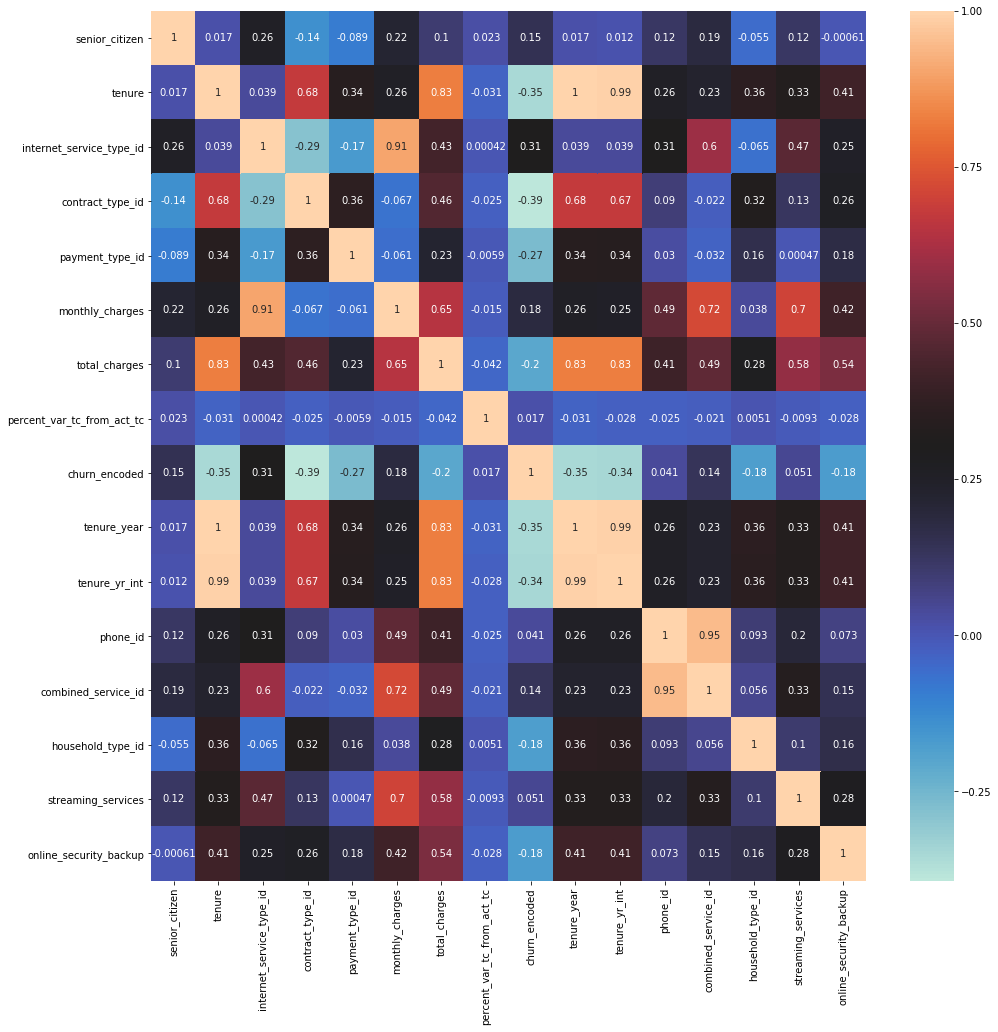

In [23]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), cmap='icefire', annot=True)

pd.crosstab (along with sns.heatmap)

pd.scatter_matrix

sns.barplot

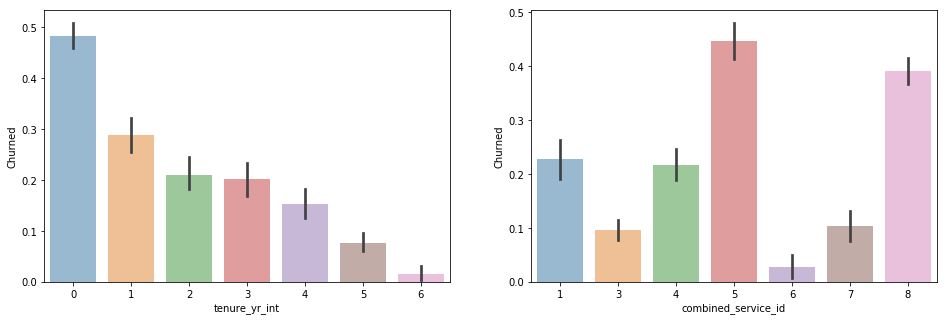

In [24]:
features = ['tenure_yr_int', 'combined_service_id']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    

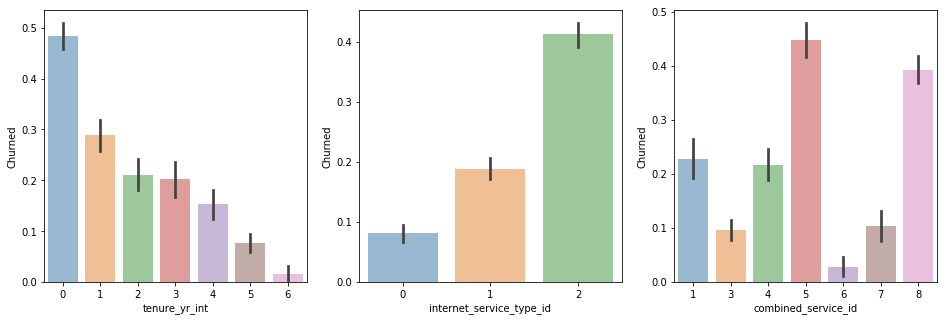

In [25]:
features = ['tenure_yr_int', 'internet_service_type_id', 'combined_service_id']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    

sns.swarmplot

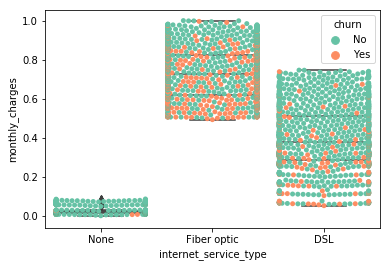

In [26]:
sns.swarmplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="internet_service_type", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

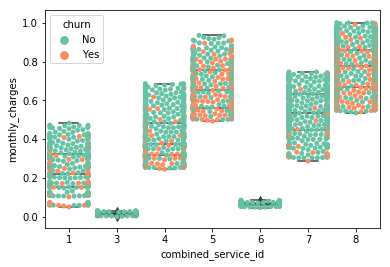

In [27]:
sns.swarmplot(x="combined_service_id", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="combined_service_id", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

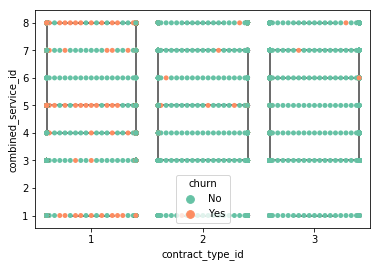

In [28]:
sns.swarmplot(x="contract_type_id", y="combined_service_id", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="contract_type_id", y="combined_service_id", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

sns.pairplot

sns.jointplot

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


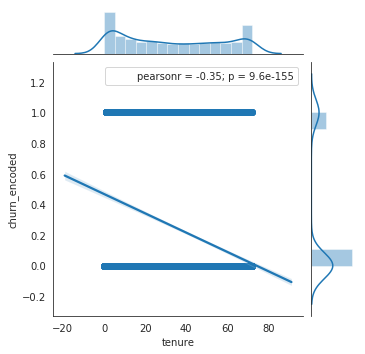

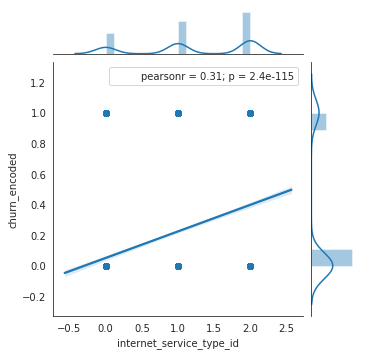

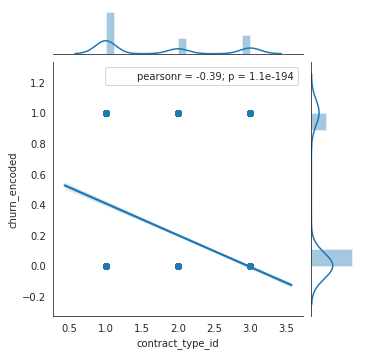

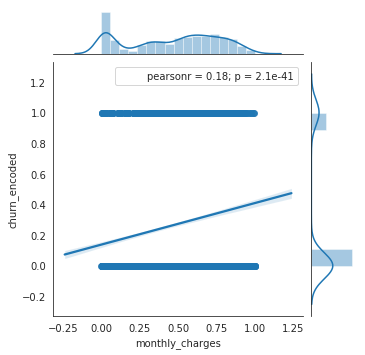

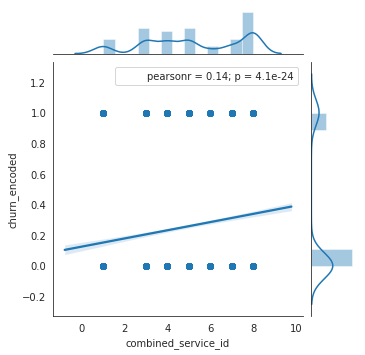

In [29]:
for i, col in enumerate(['tenure', 'internet_service_type_id', 'contract_type_id', 'monthly_charges', 'combined_service_id']):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = train[col]
        j = sns.jointplot(train[col], 'churn_encoded', data=train, kind='reg', height=5)
        j.annotate(stats.pearsonr)

sns.relplot or plt.scatter

sns.distplot or plt.hist

sns.boxplot

plt.plot

Use at least one more type of plot that is not included in the list above.

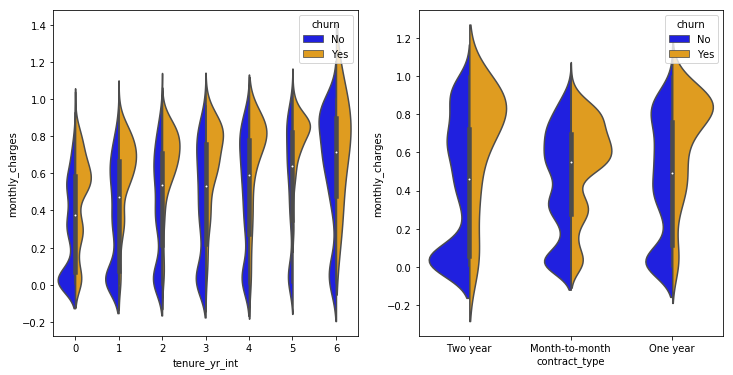

In [30]:
features = ['tenure_yr_int', 'contract_type']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

ValueError: Could not interpret input 'monthly_charges_binned'

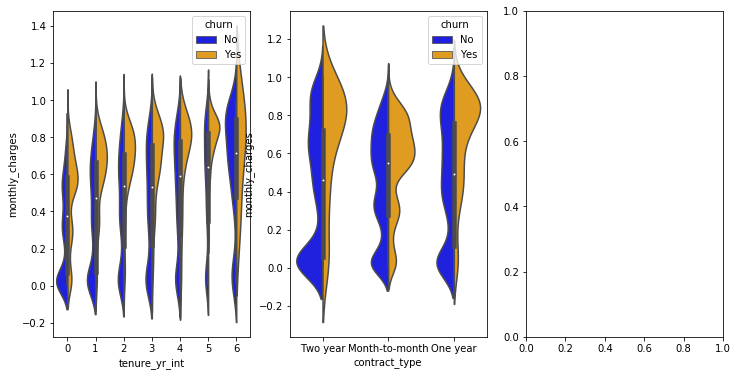

In [31]:
features = ['tenure_yr_int', 'contract_type', 'monthly_charges_binned']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

# Modeling
Feature Selection: Are there any variables that seem to provide limited to no additional information? If so, remove them.

Train (fit, transform, evaluate) multiple different models, varying the model type and your meta-parameters.

#### The following cell contains our X variables that we will use to create models.  The features being used in that particular X are highlighted in the list.

In [ ]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

X_rf_2_train = X_train[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]
X_rf_2_test = X_test[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]

X_rf_3_train = X_train[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]
X_rf_3_test = X_test[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]


## Classification/Decision Tree

In [ ]:
def analyze_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    
    print('The features being used: ' + str(features))
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')

#### The following models all use X_rf_1 which uses tenure_year, monthly_charges, and internet_service_type_id.

In [ ]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 5)

In [ ]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 4)

In [ ]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

In [ ]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4)

#### The following models all use X_rf_2 which uses tenure_year, monthly_charges, and cust_serv_type.

In [ ]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'gini', 5)

In [ ]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'gini', 4)

In [ ]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'entropy', 5)

In [ ]:
analyze_classification_model(X_rf_3_train, X_rf_3_test, y_train, y_test, 'entropy', 4)

#### The following models all use X_rf_3 which uses tenure_year, monthly_charges, and cust_serv_type.

In [ ]:
analyze_classification_model(X_rf_3_train, X_rf_3_test, y_train, y_test, 'entropy', 7)

#### Let's test our best decision tree.

In [ ]:
def test_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    
    print('The features being used: ' + str(features))
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')    
    
    print('The results of running the model on the test sample:')
    


    print('-----')
    
    y_df_pred_test = clf.predict(X_df_test)
    y_df_pred_proba_test = clf.predict_proba(X_df_test)
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(clf.score(X_df_test, y_df_test)))
    print('-----')

In [ ]:
test_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

## Logistic Regression

In [ ]:
def analyze_log_reg(X_df_train, X_df_test, y_df_train, y_df_test, solver_name):
    features = list(X_df_train)
    
    print('Results using ' + str(solver_name) + ' as the solver.')
    print('The features being used: ' + str(features))
    print('-----')

    logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver=solver_name)
    logit.fit(X_df_train, y_df_train)
    print('-----')
    
    print('Coefficient: \n', logit.coef_)
    print('Intercept: \n', logit.intercept_)
    print('-----')

    y_df_pred = logit.predict(X_df_train)
    y_df_pred_proba = logit.predict_proba(X_df_train)
    print('Accuracy of Logistic Regression classifier on training set: {:.6f}'
         .format(logit.score(X_df_train, y_df_train)))
    print('-----')

    print('The results of running the model on the train sample:')

    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
                 columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
        

In [ ]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'saga')

In [ ]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'liblinear')

In [ ]:
analyze_log_reg(X_rf_2_train, X_rf_2_test, y_train, y_test, 'saga')

In [ ]:
analyze_log_reg(X_rf_2_train, X_rf_2_test, y_train, y_test, 'liblinear')

## KNN - These tend to have great accuracy on train samples, but perform poorly on test.  We will not use these.

In [ ]:
def analyze_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')

In [ ]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

In [ ]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'uniform')

In [ ]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

In [ ]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'distance')

## Test KNN that performed best on train set.  These are high numbers, let's hope for the best...

In [ ]:
def test_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic KNN classifier on test set: {:.6f}'
     .format(knn.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
   

### We had some great results on the train set, but running it on the test shows that this model overfit.

In [ ]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

### Let's check the lower KNN just to be safe.

In [ ]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

### Still not all that great.

## Random Forests - RF will not be used as we will want to be able to explain our model and how it categorizes each customer.

In [ ]:
def analyze_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('Accuracy of RF classifier on train set: {:.6f}'
     .format(rf.score(X_df_train, y_df_train)))
    print('-----')
    

In [ ]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

In [ ]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5, 6)

In [ ]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 8, 8)

In [ ]:
def test_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(rf.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
    return Probabilities_on_X_test
    

In [ ]:
test_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Compare evaluation metrics across all the models, and select the best performing model.

In [ ]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

In [ ]:
best_model.fit(X_rf_2_train, y_train)

In [ ]:
y_pred_train = best_model.predict(X_rf_2_train)
print('Head of predicted on X_train:')
print(y_pred_train[0:5])
print('-----')

In [ ]:
y_train_pred_proba = best_model.predict_proba(X_rf_2_train)
print('Head of probabilities on X_train:')
print(y_train_pred_proba[0:5])
print('-----')

print('Accuracy of rf classifier on training set: {:.8f}'.format(best_model.score(X_rf_2_train, y_train)))
print('-----')

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
print(cm)
print('-----')

In [ ]:
print(classification_report(y_train, y_pred_train, digits=4))
print('-----')

In [ ]:
y_pred_test = best_model.predict(X_rf_2_test)
y_pred_proba_test = best_model.predict_proba(X_rf_2_test)

print('-----')

In [ ]:
print('The results of running the model on the test sample:')
    
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
print(cm)
print('-----')

In [ ]:
print(classification_report(y_test, y_pred_test, digits=4))
print('-----')

In [ ]:
y_pred_test = best_model.predict(X_rf_2_test)
y_df_pred_proba_test = best_model.predict_proba(X_rf_2_test)
print('-----')
print('Head of probabilities on X_test:')
print(y_df_pred_proba_test[:5])
print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
    .format(best_model.score(X_rf_2_test, y_test)))
print('-----')
Probabilities_on_X_test = y_pred_proba_test

### Test the final model (transform, evaluate) on your out-of-sample data (the testing data set). Summarize the performance. Interpret your results.

Summary of our best model run against the test sample:

The overall accuracy of the model on the test sample is 78.7%.  The accuracy for the train set was 79.1%.  This means that overall, this model is consistent.
    
Given the customer did churn, our precision is 67%.  
Given the customer did not churn, our precision is 81%.

Given that the model predicted a customer to churn, the recall is 42%.  This is the true positive rate.
Given that the model predicted a customer to not churn, the recall is 92%.

The false positive rate is 33%.  This is saying that of the predicted churns, the model was not accurate on 33%.

This tells us that the model is better at predicting that a customer does not churn.  That being said, a reasonable result of who to focus our efforts on by removing the most probable to not churn and then focusing on the remaining customers.

### Let's work to turn the probabilities from an array to a dataframe.  Then we can create a dataframe with the customer id and merge the two.  This will be the df that we can export to a CSV to show probabilities of churn on the test sample.

In [ ]:
probabilities_alone = pd.DataFrame({'No_Churn_Prob':y_pred_proba_test[:,0], 'Churn_Prob':y_pred_proba_test[:,1]})
probabilities_alone.head()

In [ ]:
prediction = pd.DataFrame({'Prediction':y_pred_test})
prediction.head()

In [ ]:
customer_id = test[['customer_id']]
customer_id.head()

In [ ]:
customer_id = customer_id.reset_index(drop=True)
customer_id.head()

In [ ]:
probabilities_alone.shape

In [ ]:
customer_id.shape

In [ ]:
y_pred_test.shape

In [ ]:
test_churn_probabilities = pd.concat([customer_id, probabilities_alone, prediction], axis=1)
test_churn_probabilities.head(10)

In [ ]:
export_csv = test_churn_probabilities.to_csv(r'test_probabilities.csv')

#### Let's visualize what the decision tree is evaluating.

In [ ]:
dot_data = tree.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('churn_decision_tree', view=True)